In [1]:
import simpful as sf
import matplotlib.pyplot as plt
import pandas as pd

FS = sf.FuzzySystem(show_banner=False)

<Axes: ylabel='Membership degree'>

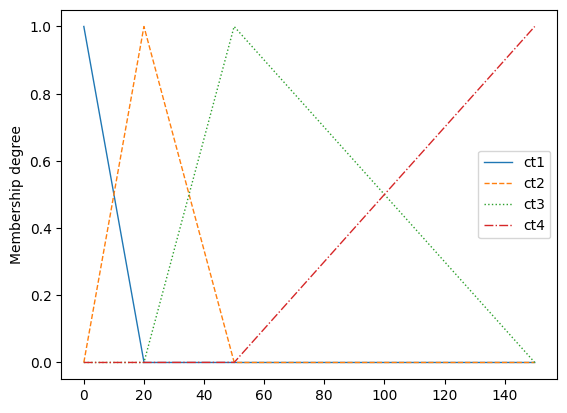

In [2]:
tfs_new_cases = [sf.TriangleFuzzySet(0,0,20, term='ct1'),
sf.TriangleFuzzySet(0,20,50, term='ct2'),
sf.TriangleFuzzySet(20,50,150, term='ct3'),
sf.TriangleFuzzySet(50,150,150, term='ct4'),
]

lv_new_cases = sf.LinguisticVariable(tfs_new_cases,
universe_of_discourse=[0, 150])

FS.add_linguistic_variable("new_cases",
lv_new_cases)

_, ax = plt.subplots()
lv_new_cases.draw(ax)

<Axes: ylabel='Membership degree'>

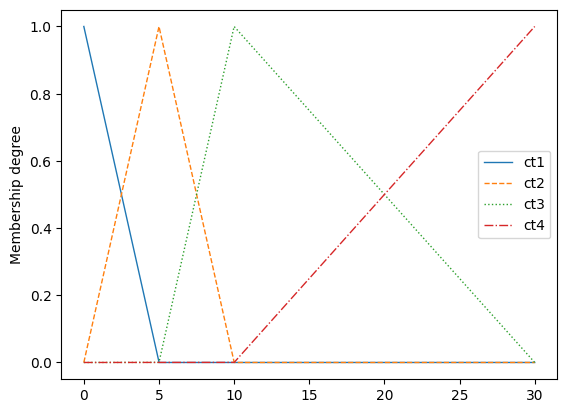

In [3]:
tfs_hospitalization = [sf.TriangleFuzzySet(0,0,5, term='ct1'),
sf.TriangleFuzzySet(0,5,10, term='ct2'),
sf.TriangleFuzzySet(5,10,30, term='ct3'),
sf.TriangleFuzzySet(10,30,30, term='ct4'),
]

lv_hospitalization = sf.LinguisticVariable(tfs_hospitalization,
                                           universe_of_discourse=[0, 30])

FS.add_linguistic_variable("hospitalization_rate",
                           lv_hospitalization
                           )

_, ax = plt.subplots()
lv_hospitalization.draw(ax)

<Axes: ylabel='Membership degree'>

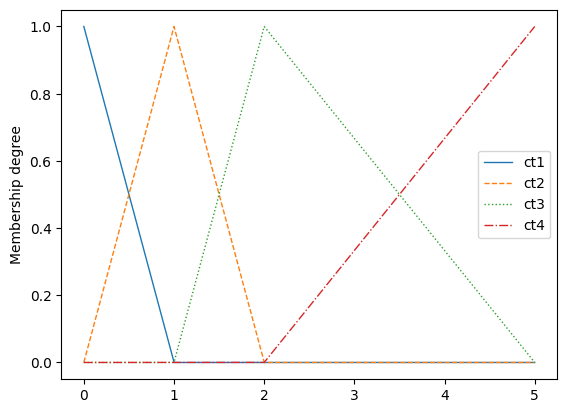

In [4]:
tfs_mortality = [sf.TriangleFuzzySet(0,0,1, term='ct1'),
              sf.TriangleFuzzySet(0,1,2, term='ct2'),
              sf.TriangleFuzzySet(1,2,5, term='ct3'),
              sf.TriangleFuzzySet(2,5,5, term='ct4'),
              ]

lv_mort = sf.LinguisticVariable(tfs_mortality, universe_of_discourse=[0, 5])

FS.add_linguistic_variable("mortality",
                           lv_mort
                           )

_, ax = plt.subplots()
lv_mort.draw(ax)

<Axes: ylabel='Membership degree'>

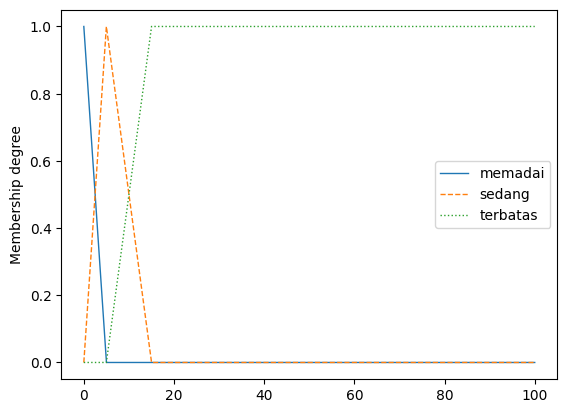

In [5]:
tfs_testing = [sf.TriangleFuzzySet(0, 0, 5, term='memadai'),
               sf.TriangleFuzzySet(0, 5, 15, term='sedang'),
               sf.TrapezoidFuzzySet(5, 15, 100, 100, term='terbatas')
               ]

lv_testing = sf.LinguisticVariable(tfs_testing, universe_of_discourse=[0, 100])

FS.add_linguistic_variable("testing",
                           lv_testing
                           )

_, ax = plt.subplots()
lv_testing.draw(ax)

<Axes: ylabel='Membership degree'>

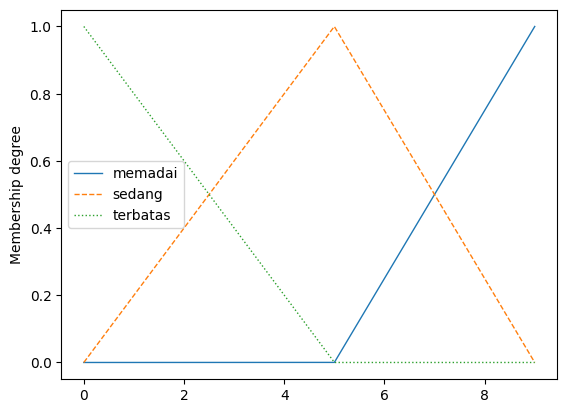

In [6]:
tfs_tracing = [sf.TriangleFuzzySet(5, 9, 9, term='memadai'),
               sf.TriangleFuzzySet(0, 5, 9, term='sedang'),
               sf.TriangleFuzzySet(0, 0, 5, term='terbatas')
               ]

lv_tracing = sf.LinguisticVariable(tfs_tracing, universe_of_discourse=[0, 9])

FS.add_linguistic_variable("tracing_ratio",
                           lv_tracing
                           )

_, ax = plt.subplots()
lv_tracing.draw(ax)

<Axes: ylabel='Membership degree'>

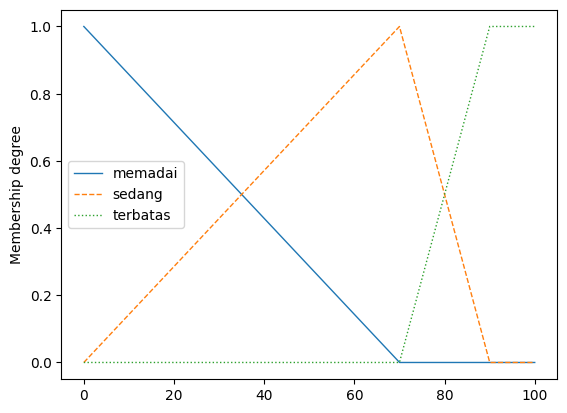

In [7]:
tfs_bor = [sf.TriangleFuzzySet(0, 0, 70, term='memadai'),
           sf.TriangleFuzzySet(0, 70, 90, term='sedang'),
           sf.TrapezoidFuzzySet(70, 90, 100, 100, term='terbatas')
           ]

lv_bor = sf.LinguisticVariable(tfs_bor, universe_of_discourse=[0, 100])

FS.add_linguistic_variable("bed_occupancy_rate",
                           lv_bor
                           )

_, ax = plt.subplots()
lv_bor.draw(ax)

<Axes: ylabel='Membership degree'>

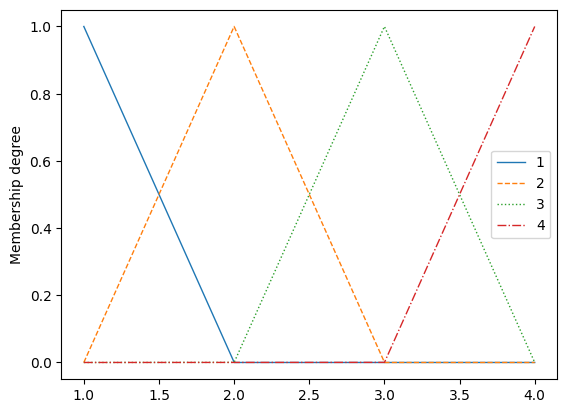

In [8]:
# FS.set_crisp_output_value('1', 1)
# FS.set_crisp_output_value('2', 2)
# FS.set_crisp_output_value('3', 3)
# FS.set_crisp_output_value('4', 4)

ppkm = [
    sf.TriangleFuzzySet(1, 1, 2, term='1'),
    sf.TriangleFuzzySet(1, 2, 3, term='2'),
    sf.TriangleFuzzySet(2, 3, 4, term='3'),
    sf.TriangleFuzzySet(3, 4, 4, term='4')
]

lv_ppkm = sf.LinguisticVariable(ppkm, universe_of_discourse=[1, 4])

FS.add_linguistic_variable(
    "ppkm",
    lv_ppkm
)

_, ax = plt.subplots()
lv_ppkm.draw(ax)

In [9]:
rules = [
    "IF (hospitalization_rate IS ct1) AND (mortality IS ct1) AND (new_cases IS ct1) OR (testing IS memadai) AND (tracing_ratio IS memadai) AND (bed_occupancy_rate IS memadai) THEN (ppkm IS 1)",
    "IF (hospitalization_rate IS ct1) AND (mortality IS ct1) AND (new_cases IS ct1) OR (testing IS sedang) AND (tracing_ratio IS sedang) AND (bed_occupancy_rate IS sedang) THEN (ppkm IS 2)",
    "IF (hospitalization_rate IS ct1) AND (mortality IS ct1) AND (new_cases IS ct1) OR (testing IS terbatas) AND (tracing_ratio IS terbatas) AND (bed_occupancy_rate IS terbatas) THEN (ppkm IS 2)",
    "IF (hospitalization_rate IS ct2) AND (mortality IS ct2) AND (new_cases IS ct2) OR (testing IS memadai) AND (tracing_ratio IS memadai) AND (bed_occupancy_rate IS memadai) THEN (ppkm IS 2)",
    "IF (hospitalization_rate IS ct2) AND (mortality IS ct2) AND (new_cases IS ct2) OR (testing IS sedang) AND (tracing_ratio IS sedang) AND (bed_occupancy_rate IS sedang) THEN (ppkm IS 2)",
    "IF (hospitalization_rate IS ct2) AND (mortality IS ct2) AND (new_cases IS ct2) OR (testing IS terbatas) AND (tracing_ratio IS terbatas) AND (bed_occupancy_rate IS terbatas) THEN (ppkm IS 3)",
    "IF (hospitalization_rate IS ct3) AND (mortality IS ct3) AND (new_cases IS ct3) OR (testing IS memadai) AND (tracing_ratio IS memadai) AND (bed_occupancy_rate IS memadai) THEN (ppkm IS 2)",
    "IF (hospitalization_rate IS ct3) AND (mortality IS ct3) AND (new_cases IS ct3) OR (testing IS sedang) AND (tracing_ratio IS sedang) AND (bed_occupancy_rate IS sedang) THEN (ppkm IS 3)",
    "IF (hospitalization_rate IS ct3) AND (mortality IS ct3) AND (new_cases IS ct3) OR (testing IS terbatas) AND (tracing_ratio IS terbatas) AND (bed_occupancy_rate IS terbatas) THEN (ppkm IS 3)",
    "IF (hospitalization_rate IS ct4) AND (mortality IS ct4) AND (new_cases IS ct4) OR (testing IS memadai) AND (tracing_ratio IS memadai) AND (bed_occupancy_rate IS memadai) THEN (ppkm IS 3)",
    "IF (hospitalization_rate IS ct4) AND (mortality IS ct4) AND (new_cases IS ct4) OR (testing IS sedang) AND (tracing_ratio IS sedang) AND (bed_occupancy_rate IS sedang) THEN (ppkm IS 3)",
    "IF (hospitalization_rate IS ct4) AND (mortality IS ct4) AND (new_cases IS ct4) OR (testing IS terbatas) AND (tracing_ratio IS terbatas) AND (bed_occupancy_rate IS terbatas) THEN (ppkm IS 4)",
	]

FS.add_rules(rules)

 * Detected Sugeno model type


<Axes: ylabel='Membership degree'>

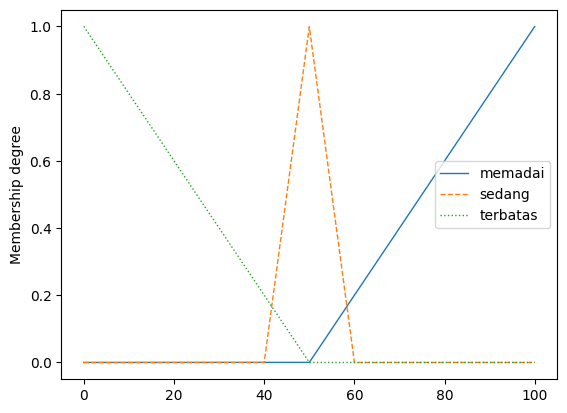

In [10]:
FS2 = sf.FuzzySystem(show_banner=False)

vaksin_lansia = [
    sf.TriangleFuzzySet(50, 100, 100, term='memadai'),
    sf.TriangleFuzzySet(40, 50, 60, term='sedang'),
    sf.TriangleFuzzySet(0, 0, 50, term='terbatas')
]

lv_vl = sf.LinguisticVariable(vaksin_lansia, universe_of_discourse=[0, 100])

FS2.add_linguistic_variable(
    "vaksin_lansia",
    lv_vl
)

vaksin_umum = [
    sf.TriangleFuzzySet(60, 100, 100, term='memadai'),
    sf.TriangleFuzzySet(50, 60, 70, term='sedang'),
    sf.TriangleFuzzySet(0, 0, 60, term='terbatas')
]

lv_vu = sf.LinguisticVariable(vaksin_umum, universe_of_discourse=[0, 100])

FS2.add_linguistic_variable(
    "vaksin_umum",
    lv_vu
)

ppkm = [
    sf.TriangleFuzzySet(1, 1, 2, term='1'),
    sf.TriangleFuzzySet(1, 2, 3, term='2'),
    sf.TriangleFuzzySet(2, 3, 4, term='3'),
    sf.TriangleFuzzySet(3, 4, 4, term='4')
]

lv_ppkm = sf.LinguisticVariable(ppkm, universe_of_discourse=[1, 4])

FS2.add_linguistic_variable(
    "ppkm",
    lv_ppkm
)

FS2.set_crisp_output_value('1', 1)
FS2.set_crisp_output_value('2', 2)
FS2.set_crisp_output_value('3', 3)
FS2.set_crisp_output_value('4', 4)

rules = [
    "IF (ppkm IS 1) AND (vaksin_lansia IS memadai) AND (vaksin_umum IS memadai) THEN (output IS 1)",
    "IF (ppkm IS 1) AND (vaksin_lansia IS sedang) AND (vaksin_umum IS sedang)  THEN (output IS 2)",
    "IF (ppkm IS 1) AND (vaksin_lansia IS terbatas) AND (vaksin_umum IS terbatas)  THEN (output IS 2)",
    "IF (ppkm IS 2) AND (vaksin_lansia IS memadai) AND (vaksin_umum IS memadai)  THEN (output IS 2)",
    "IF (ppkm IS 2) AND (vaksin_lansia IS sedang) AND (vaksin_umum IS sedang)  THEN (output IS 2)",
    "IF (ppkm IS 2) AND (vaksin_lansia IS terbatas) AND (vaksin_umum IS terbatas)  THEN (output IS 3)",
    "IF (ppkm IS 3) AND (vaksin_lansia IS memadai) AND (vaksin_umum IS memadai)  THEN (output IS 2)",
    "IF (ppkm IS 3) AND (vaksin_lansia IS sedang) AND (vaksin_umum IS sedang)  THEN (output IS 3)",
    "IF (ppkm IS 3) AND (vaksin_lansia IS terbatas) AND (vaksin_umum IS terbatas)  THEN (output IS 3)",
    "IF (ppkm IS 4) AND (vaksin_lansia IS memadai) AND (vaksin_umum IS memadai)  THEN (output IS 3)",
    "IF (ppkm IS 4) AND (vaksin_lansia IS sedang) AND (vaksin_umum IS sedang)  THEN (output IS 3)",
    "IF (ppkm IS 4) AND (vaksin_lansia IS terbatas) AND (vaksin_umum IS terbatas) THEN (output IS 4)",
]

FS2.add_rules(rules)

_, ax = plt.subplots()
lv_vl.draw(ax)

<Axes: ylabel='Membership degree'>

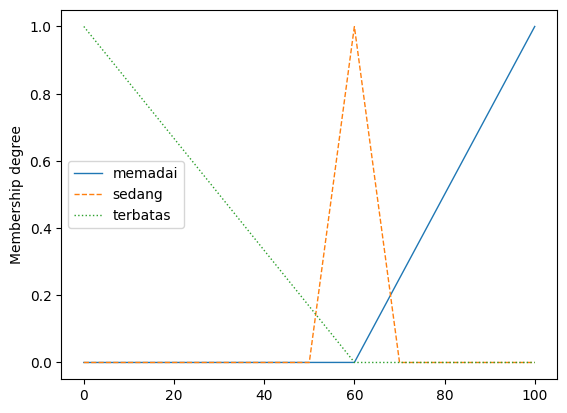

In [11]:
_, ax = plt.subplots()
lv_vu.draw(ax)

<Axes: ylabel='Membership degree'>

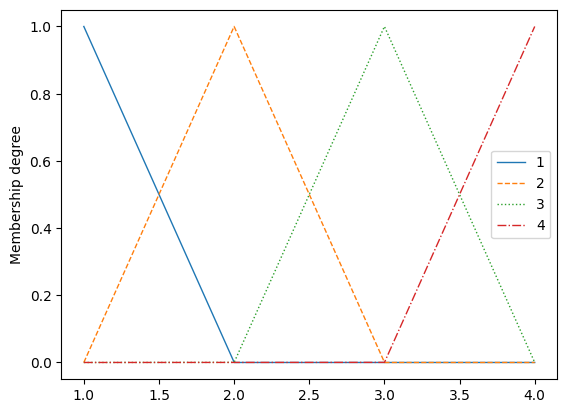

In [12]:
_, ax = plt.subplots()
lv_ppkm.draw(ax)

In [13]:
input = {
         'new_cases':0.17,
         'hospitalization_rate':0.04,
         'mortality':0.02,
         'testing':0.86,
         'tracing_ratio':0.0,
         'bed_occupancy_rate':8.85
         }

for label, data in input.items():
    FS.set_variable(label, data)

In [14]:
output = FS.Mamdani_inference()
output
output = output['ppkm']
FS2.set_variable('ppkm', round(output))
FS2.set_variable('vaksin_lansia', 69.76)
FS2.set_variable('vaksin_umum', 69.76)

result = FS2.inference()
result['output']

2.0

In [15]:
import pickle

with open('FS1.pickle','wb') as f:
    pickle.dump(FS, f, pickle.HIGHEST_PROTOCOL)

with open('FS2.pickle','wb') as f:
    pickle.dump(FS2, f, pickle.HIGHEST_PROTOCOL)

In [16]:
import pickle

with open('FS1.pickle', 'rb') as f:
    FS = pickle.load(f)

with open('FS2.pickle', 'rb') as f:
    FS2 = pickle.load(f)

In [17]:
def predict(x):
    input = {'new_cases':x['new_cases'],
            'hospitalization_rate':x['hospitalization_rate'],
            'mortality':x['mortality'],
            'testing':x['testing'],
            'tracing_ratio':x['tracing_ratio'],
            'bed_occupancy_rate':x['bed_occupancy_rate']
            }

    for label, data in input.items():
        FS.set_variable(label, data)

    result = FS.Mamdani_inference()
    result = result['ppkm']
    FS2.set_variable('ppkm', round(result))
    FS2.set_variable('vaksin_umum', x['vaksin_umum'])
    FS2.set_variable('vaksin_lansia', x['vaksin_lansia'])

    result = FS2.inference()
    return result['output']

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def test(filepath, filetype):
    df = pd.read_csv(filepath, sep=',')
    df = df.set_index(keys=[filetype])
    df = df.fillna(0)
    df['ppkm'] = df['ppkm'].astype('category')
    x = df.drop(['ppkm'], axis=1)
    y = df['ppkm']
    y_pred = x.apply(predict, axis=1)
    y_pred = y_pred.apply(lambda x: round(x))
    y_pred = y_pred.astype('category')
    print(classification_report(y, y_pred, output_dict=True, zero_division=1))

In [ ]:
test('./ppkm - kabupaten.csv', 'Kabupaten/ Kota')

In [ ]:
test('./ppkm - provinsi.csv', 'Provinsi')